# RPI Democratic Primary Analysis


Summary:

* 75 Responses
* Collected from 9/29/2019 to 10/3/2019 (5 days)

In [1]:
#Datacol names:

cols = ["Timestamp", "RPI status", "Gender", "Ethnicity", "Age Range", "Household Income",
 "Region", "Voting Registration", "Party Registration", "Primary/Caucus", "Ideology",
 "First Candidate", "Second Candidate", "GE Odds", "Biden Fav", "Warren Fav", "Sanders Fav", 
 "Buttigieg Fav", "Harris Fav", "Yang Fav", "First Republican", "Trump Approval",
 "Impeachment Approval", "Biden V Trump", "Warren V Trump", "Sanders V Trump", "Buttigieg V Trump",
 "Harris V Trump", "Yang V Trump", "2016 Primary", "2016 GE", "Electoral College Approval",
 "Top Issue", "Gun Reform Approval", "Climate Change Approval"]
 

In [2]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

In [3]:
poll_data = pd.read_csv("data/RPIDemPoll.csv")
poll_data.columns = cols
poll_data.shape

(75, 35)

In [4]:
poll_data.head()

,Timestamp,RPI status,Gender,Ethnicity,Age Range,Household Income,Region,Voting Registration,Party Registration,Primary/Caucus,...,Sanders V Trump,Buttigieg V Trump,Harris V Trump,Yang V Trump,2016 Primary,2016 GE,Electoral College Approval,Top Issue,Gun Reform Approval,Climate Change Approval
0,2019/09/28 10:58:19 AM AST,Current Student,Male,Hispanic or Latino,26-29,"Under $50,000 a year",NorthEast,Yes,Democratic Party,Democratic Primary or Caucus,...,Bernie Sanders,Pete Buttigieg,Kamala Harris,Andrew Yang,Did not vote/ineligible,Hillary Clinton,No,Health Care,More Likely,Very Important
1,2019/09/28 10:58:47 AM AST,Current Student,Male,White or Caucasian,18-21,"$50,000 to $100,000 a year",NorthEast,Yes,Democratic Party,Democratic Primary or Caucus,...,Bernie Sanders,Pete Buttigieg,Kamala Harris,Andrew Yang,Did not vote/ineligible,Did not vote/ineligible,No,Climate Change,More Likely,Very Important
2,2019/09/28 11:00:51 AM AST,Current Student,Male,Other or Mixed Race,18-21,"$50,000 to $100,000 a year",MidWest,Yes,Democratic Party,Democratic Primary or Caucus,...,Bernie Sanders,3rd Party/Write in,Kamala Harris,3rd Party/Write in,Hillary Clinton,Hillary Clinton,No,Climate Change,More Likely,Very Important
3,2019/09/28 11:14:00 AM AST,Current Student,Male,Black or African American,18-21,"$50,000 to $100,000 a year",NorthEast,No,Democratic Party,Unsure,...,Bernie Sanders,Pete Buttigieg,3rd Party/Write in,Andrew Yang,Did not vote/ineligible,Did not vote/ineligible,No,Climate Change,More Likely,Very Important
4,2019/09/28 11:17:58 AM AST,Current Student,Male,White or Caucasian,18-21,"Under $50,000 a year",NorthEast,Yes,Democratic Party,Democratic Primary or Caucus,...,Bernie Sanders,Pete Buttigieg,3rd Party/Write in,Andrew Yang,Did not vote/ineligible,Hillary Clinton,No,Climate Change,More Likely,Very Important


In [5]:
last_name = lambda x: x.split()[1]

In [6]:
poll_data["First Candidate"] = poll_data["First Candidate"].apply(last_name)
poll_data["First Candidate"]

0       Sanders
1        Warren
2        Warren
3         Biden
4       Sanders
        ...    
70       Harris
71      Sanders
72    Buttigieg
73         Yang
74       Warren
Name: First Candidate, Length: 75, dtype: object

In [7]:
poll_data["Second Candidate"] = poll_data["Second Candidate"].apply(last_name)
poll_data["GE Odds"] = poll_data["GE Odds"].apply(last_name)
poll_data["First Republican"] = poll_data["First Republican"].apply(last_name)
poll_data["Biden V Trump"] = poll_data["Biden V Trump"].apply(last_name)
poll_data["Warren V Trump"] = poll_data["Warren V Trump"].apply(last_name)
poll_data["Sanders V Trump"] = poll_data["Sanders V Trump"].apply(last_name)
poll_data["Buttigieg V Trump"] = poll_data["Buttigieg V Trump"].apply(last_name)
poll_data["Harris V Trump"] = poll_data["Harris V Trump"].apply(last_name)
poll_data["Yang V Trump"] = poll_data["Yang V Trump"].apply(last_name)
poll_data.head()

,Timestamp,RPI status,Gender,Ethnicity,Age Range,Household Income,Region,Voting Registration,Party Registration,Primary/Caucus,...,Sanders V Trump,Buttigieg V Trump,Harris V Trump,Yang V Trump,2016 Primary,2016 GE,Electoral College Approval,Top Issue,Gun Reform Approval,Climate Change Approval
0,2019/09/28 10:58:19 AM AST,Current Student,Male,Hispanic or Latino,26-29,"Under $50,000 a year",NorthEast,Yes,Democratic Party,Democratic Primary or Caucus,...,Sanders,Buttigieg,Harris,Yang,Did not vote/ineligible,Hillary Clinton,No,Health Care,More Likely,Very Important
1,2019/09/28 10:58:47 AM AST,Current Student,Male,White or Caucasian,18-21,"$50,000 to $100,000 a year",NorthEast,Yes,Democratic Party,Democratic Primary or Caucus,...,Sanders,Buttigieg,Harris,Yang,Did not vote/ineligible,Did not vote/ineligible,No,Climate Change,More Likely,Very Important
2,2019/09/28 11:00:51 AM AST,Current Student,Male,Other or Mixed Race,18-21,"$50,000 to $100,000 a year",MidWest,Yes,Democratic Party,Democratic Primary or Caucus,...,Sanders,Party/Write,Harris,Party/Write,Hillary Clinton,Hillary Clinton,No,Climate Change,More Likely,Very Important
3,2019/09/28 11:14:00 AM AST,Current Student,Male,Black or African American,18-21,"$50,000 to $100,000 a year",NorthEast,No,Democratic Party,Unsure,...,Sanders,Buttigieg,Party/Write,Yang,Did not vote/ineligible,Did not vote/ineligible,No,Climate Change,More Likely,Very Important
4,2019/09/28 11:17:58 AM AST,Current Student,Male,White or Caucasian,18-21,"Under $50,000 a year",NorthEast,Yes,Democratic Party,Democratic Primary or Caucus,...,Sanders,Buttigieg,Party/Write,Yang,Did not vote/ineligible,Hillary Clinton,No,Climate Change,More Likely,Very Important


In [8]:
main_poll = poll_data[["RPI status", "Gender", "Ethnicity", "Age Range", "Household Income",
 "Region", "Voting Registration", "Party Registration", "Primary/Caucus", "Ideology",
 "First Candidate", "Second Candidate"]]

In [9]:
main_poll.head()

,RPI status,Gender,Ethnicity,Age Range,Household Income,Region,Voting Registration,Party Registration,Primary/Caucus,Ideology,First Candidate,Second Candidate
0,Current Student,Male,Hispanic or Latino,26-29,"Under $50,000 a year",NorthEast,Yes,Democratic Party,Democratic Primary or Caucus,Very Liberal,Sanders,Warren
1,Current Student,Male,White or Caucasian,18-21,"$50,000 to $100,000 a year",NorthEast,Yes,Democratic Party,Democratic Primary or Caucus,Very Liberal,Warren,Sanders
2,Current Student,Male,Other or Mixed Race,18-21,"$50,000 to $100,000 a year",MidWest,Yes,Democratic Party,Democratic Primary or Caucus,Very Liberal,Warren,Harris
3,Current Student,Male,Black or African American,18-21,"$50,000 to $100,000 a year",NorthEast,No,Democratic Party,Unsure,Somewhat Liberal,Biden,Sanders
4,Current Student,Male,White or Caucasian,18-21,"Under $50,000 a year",NorthEast,Yes,Democratic Party,Democratic Primary or Caucus,Very Liberal,Sanders,Warren


In [10]:
main_poll.shape

(75, 12)

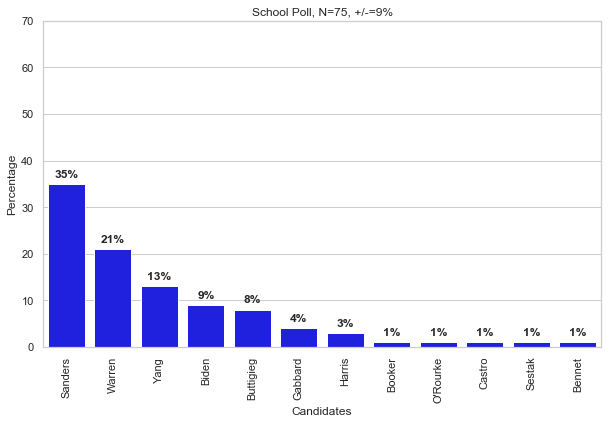

In [12]:
# Create a dataframe of aggregate candidate choices

first_candidate = main_poll["First Candidate"].value_counts()
first_candidate = (first_candidate * 100) / first_candidate.sum()
first_candidate = pd.DataFrame(first_candidate.items())
first_candidate.columns = ["Candidates", "Percentage"]
first_candidate["Percentage"] = first_candidate["Percentage"].apply(lambda x: round(x))
first_candidate["labels"] = first_candidate["Percentage"].apply(lambda x: "{}%".format(x))

# Margin of Error
s_e = sqrt((first_candidate.loc[0,"Percentage"]/100)*(1-(first_candidate.loc[0,"Percentage"]/100))/main_poll.shape[0])
cv = 1.64
ME = s_e * cv

# Create plot
plt.figure(figsize=(10, 6))
sns.set(style = "whitegrid")
ax = sns.barplot(x=first_candidate["Candidates"], y=first_candidate["Percentage"], color="Blue")
plt.xticks(range(first_candidate["Candidates"].shape[0]), first_candidate["Candidates"], rotation=90)
ax.set_title("School Poll, N=75, +/-={}%".format(round(ME*100)))
ax.set_ylim(top=first_candidate["Percentage"].max()*2)

bars = ax.patches
for rect, label in zip(bars, first_candidate["labels"]):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom', fontweight="bold", fontsize=12)
plt.show()

In [13]:
first_candidate[["Candidates","labels"]]

,Candidates,labels
0,Sanders,35%
1,Warren,21%
2,Yang,13%
3,Biden,9%
4,Buttigieg,8%
5,Gabbard,4%
6,Harris,3%
7,Booker,1%
8,O'Rourke,1%
9,Castro,1%


In [14]:
# Second Candidates
second_choices = main_poll[["First Candidate", "Second Candidate"]]
second_choices = second_choices[second_choices["First Candidate"] != second_choices["Second Candidate"]]
second_choices["Count"] = 1
second_choices.groupby(["First Candidate", "Second Candidate"]).count()

Count
First Candidate Second Candidate       
Bennet          Biden                 1
Biden           Buttigieg             1
                Delaney               1
                Gabbard               1
                Harris                1
                Sanders               1
                Warren                1
                Yang                  1
Booker          Yang                  1
Buttigieg       Biden                 2
                Harris                3
                Warren                1
Castro          Warren                1
Gabbard         Booker                1
Harris          Delaney               1
                Sanders               1
O'Rourke        Sanders               1
Sanders         Biden                 2
                Castro                1
                Gabbard               1
                Warren               16
                Williamson            3
                Yang                  3
Warren          Bennet                1
                Biden                 4
                Booker                1
                Buttigieg             1
                Harris                2
                O'Rourke              1
                Sanders               6
Yang            Gabbard               2
                Sanders               5